In [1]:
pip install xgboost scikit-learn pandas


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Ronald Wilson\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBRegressor

# -------------------------
# 1. Load Data
# -------------------------
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_solution.csv")

# -------------------------
# 2. Preprocess: Split Features and Targets
# -------------------------
X_train = train_df.iloc[:, :55]         # 55 input features
y_train = train_df.iloc[:, 55:]         # 10 target columns

X_test = test_df.drop(columns=["ID"])   # Drop ID column from test

# -------------------------
# 3. Build MultiOutput XGBoost Model (CPU)
# -------------------------
base_model = XGBRegressor(
    n_estimators=500,
    max_depth=5,
    learning_rate=0.03,
    objective='reg:squarederror',
    random_state=42,
    tree_method='hist',    # Change to 'gpu_hist' if using GPU
    n_jobs=-1              # Use all CPU cores
)

model = MultiOutputRegressor(base_model)
model.fit(X_train, y_train)

# -------------------------
# 4. Evaluate on Training Data
# -------------------------
train_preds = model.predict(X_train)
mape = mean_absolute_percentage_error(y_train, train_preds)
print(f"Train MAPE: {mape:.4f}")

# -------------------------
# 5. Predict on Test Set
# -------------------------
test_preds = model.predict(X_test)
test_preds = np.array(test_preds, dtype=np.float32)  # ensure float32 precision

# -------------------------
# 6. Generate Submission File
# -------------------------
submission = pd.DataFrame(test_preds, columns=sample_submission.columns[1:])
submission.insert(0, 'ID', test_df['ID'])  # Add ID column

submission.to_csv("xgb_submission.csv", index=False)
print("✅ Submission file saved as 'xgb_submission.csv'")


Train MAPE: 0.3743
✅ Submission file saved as 'xgb_submission.csv'


In [8]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Ronald Wilson\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [10]:
pip install seaborn sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


    ERROR: Command errored out with exit status 1:
     command: 'c:\Users\Ronald Wilson\AppData\Local\Programs\Python\Python310\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Ronald Wilson\\AppData\\Local\\Temp\\pip-install-tp6pec8m\\sklearn_a7a455fd9972465691cef986da4d6102\\setup.py'"'"'; __file__='"'"'C:\\Users\\Ronald Wilson\\AppData\\Local\\Temp\\pip-install-tp6pec8m\\sklearn_a7a455fd9972465691cef986da4d6102\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Ronald Wilson\AppData\Local\Temp\pip-pip-egg-info-fonlsibs'
         cwd: C:\Users\Ronald Wilson\AppData\Local\Temp\pip-install-tp6pec8m\sklearn_a7a455fd9972465691cef986da4d6102\
    Complete output (15 lines):
    The 'sklearn' PyPI pack

📊 Loading dataset...

Original Dataset Analysis
📊 Dataset Shape: (2000, 55)
📊 Target Shape: (2000, 10)
📊 Missing Values: 0

🔍 Feature Statistics:
Mean range: -0.0183 to 0.3421
Std range: 0.0802 to 1.0163
Scale difference: 12.67x

🎯 Target Statistics:
Target mean range: -0.0172 to -0.0015
Target std range: 0.9865 to 1.0092

📐 Skewness Analysis:
Features with high skewness (>2): 0
Features with moderate skewness (1-2): 0
Targets with high skewness (>2): 0

🚨 Outlier Analysis:
Average outliers per feature: 10.2
Max outliers in single feature: 26

🔗 Correlation Analysis:
Highly correlated feature pairs (>0.8): 0

🔧 Fitting preprocessing pipeline...
🧪 Testing transformation combinations...
Testing: Features=none, Targets=none
Testing: Features=none, Targets=log
Testing: Features=none, Targets=power
Testing: Features=standard, Targets=none
Testing: Features=standard, Targets=log
Testing: Features=standard, Targets=power
Testing: Features=robust, Targets=none
Testing: Features=robust, Targets

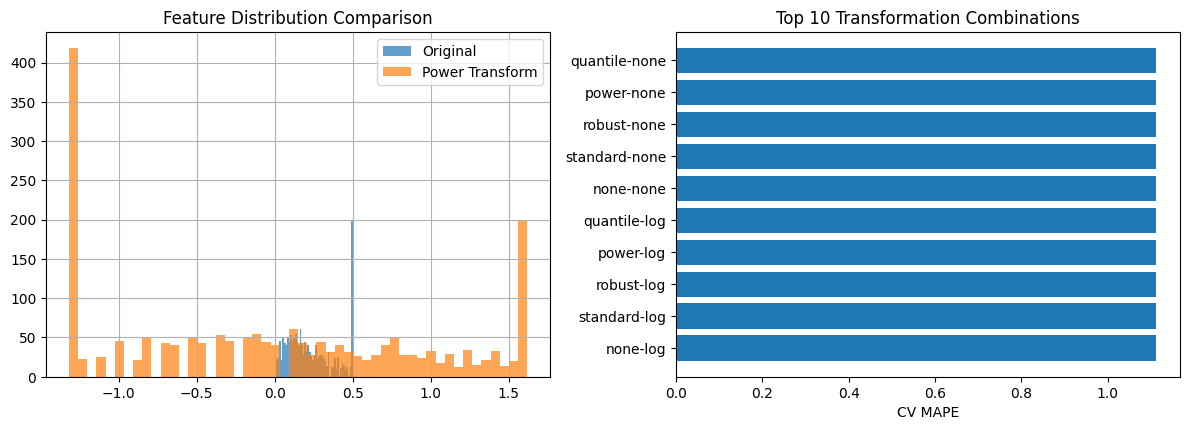


📈 Analysis complete! Best preprocessing approach identified.
💾 Results saved to preprocessing_analysis.png


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import (
    StandardScaler, RobustScaler, MinMaxScaler, 
    PowerTransformer, QuantileTransformer
)
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# -------------------------
# 1. Dataset Analysis Function
# -------------------------
def analyze_dataset(X, y, title="Dataset Analysis"):
    """Comprehensive dataset analysis"""
    print(f"\n{'='*50}")
    print(f"{title}")
    print(f"{'='*50}")
    
    # Basic info
    print(f"📊 Dataset Shape: {X.shape}")
    print(f"📊 Target Shape: {y.shape}")
    print(f"📊 Missing Values: {X.isnull().sum().sum()}")
    
    # Feature statistics
    print(f"\n🔍 Feature Statistics:")
    feature_stats = X.describe().T
    print(f"Mean range: {feature_stats['mean'].min():.4f} to {feature_stats['mean'].max():.4f}")
    print(f"Std range: {feature_stats['std'].min():.4f} to {feature_stats['std'].max():.4f}")
    print(f"Scale difference: {feature_stats['std'].max() / feature_stats['std'].min():.2f}x")
    
    # Target statistics
    print(f"\n🎯 Target Statistics:")
    target_stats = y.describe().T
    print(f"Target mean range: {target_stats['mean'].min():.4f} to {target_stats['mean'].max():.4f}")
    print(f"Target std range: {target_stats['std'].min():.4f} to {target_stats['std'].max():.4f}")
    
    # Skewness analysis
    feature_skew = X.skew()
    target_skew = y.skew()
    
    print(f"\n📐 Skewness Analysis:")
    print(f"Features with high skewness (>2): {(abs(feature_skew) > 2).sum()}")
    print(f"Features with moderate skewness (1-2): {((abs(feature_skew) > 1) & (abs(feature_skew) <= 2)).sum()}")
    print(f"Targets with high skewness (>2): {(abs(target_skew) > 2).sum()}")
    
    # Outlier detection
    print(f"\n🚨 Outlier Analysis:")
    outlier_counts = []
    for col in X.columns:
        Q1 = X[col].quantile(0.25)
        Q3 = X[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((X[col] < (Q1 - 1.5 * IQR)) | (X[col] > (Q3 + 1.5 * IQR))).sum()
        outlier_counts.append(outliers)
    
    print(f"Average outliers per feature: {np.mean(outlier_counts):.1f}")
    print(f"Max outliers in single feature: {max(outlier_counts)}")
    
    # Correlation analysis
    print(f"\n🔗 Correlation Analysis:")
    feature_corr = X.corr()
    high_corr_pairs = 0
    for i in range(len(feature_corr.columns)):
        for j in range(i+1, len(feature_corr.columns)):
            if abs(feature_corr.iloc[i, j]) > 0.8:
                high_corr_pairs += 1
    print(f"Highly correlated feature pairs (>0.8): {high_corr_pairs}")
    
    return {
        'feature_skew': feature_skew,
        'target_skew': target_skew,
        'feature_stats': feature_stats,
        'target_stats': target_stats,
        'outlier_counts': outlier_counts
    }

# -------------------------
# 2. Preprocessing Pipeline
# -------------------------
class ComprehensivePreprocessor:
    def __init__(self):
        self.scalers = {}
        self.transformers = {}
        self.outlier_params = {}
        self.feature_names = None
        
    def fit(self, X, y):
        """Fit all preprocessing components"""
        self.feature_names = X.columns.tolist()
        
        # 1. Outlier detection parameters
        self._fit_outlier_params(X, y)
        
        # 2. Feature transformations
        self._fit_feature_transformers(X)
        
        # 3. Target transformations
        self._fit_target_transformers(y)
        
        return self
    
    def _fit_outlier_params(self, X, y):
        """Calculate outlier thresholds"""
        for col in X.columns:
            Q1 = X[col].quantile(0.01)  # More conservative
            Q3 = X[col].quantile(0.99)
            self.outlier_params[col] = (Q1, Q3)
    
    def _fit_feature_transformers(self, X):
        """Fit feature transformers"""
        # Standard scaler for ensemble partners
        self.scalers['standard'] = StandardScaler()
        self.scalers['standard'].fit(X)
        
        # Robust scaler for outlier resistance
        self.scalers['robust'] = RobustScaler()
        self.scalers['robust'].fit(X)
        
        # Power transformer for normalization
        self.transformers['power'] = PowerTransformer(method='yeo-johnson')
        self.transformers['power'].fit(X)
        
        # Quantile transformer
        self.transformers['quantile'] = QuantileTransformer(
            output_distribution='normal', n_quantiles=min(1000, X.shape[0])
        )
        self.transformers['quantile'].fit(X)
    
    def _fit_target_transformers(self, y):
        """Fit target transformers"""
        # Log transform for each target
        self.transformers['target_log'] = {}
        for col in y.columns:
            if (y[col] > 0).all():  # Only if all values are positive
                self.transformers['target_log'][col] = True
            else:
                self.transformers['target_log'][col] = False
        
        # Power transformer for targets
        self.transformers['target_power'] = PowerTransformer(method='yeo-johnson')
        self.transformers['target_power'].fit(y)
    
    def transform_features(self, X, method='none'):
        """Transform features using specified method"""
        X_transformed = X.copy()
        
        # Handle outliers first
        for col in X.columns:
            if col in self.outlier_params:
                Q1, Q3 = self.outlier_params[col]
                X_transformed[col] = X_transformed[col].clip(Q1, Q3)
        
        # Apply transformation
        if method == 'standard':
            X_transformed = pd.DataFrame(
                self.scalers['standard'].transform(X_transformed),
                columns=X.columns, index=X.index
            )
        elif method == 'robust':
            X_transformed = pd.DataFrame(
                self.scalers['robust'].transform(X_transformed),
                columns=X.columns, index=X.index
            )
        elif method == 'power':
            X_transformed = pd.DataFrame(
                self.transformers['power'].transform(X_transformed),
                columns=X.columns, index=X.index
            )
        elif method == 'quantile':
            X_transformed = pd.DataFrame(
                self.transformers['quantile'].transform(X_transformed),
                columns=X.columns, index=X.index
            )
        
        return X_transformed
    
    def transform_targets(self, y, method='none'):
        """Transform targets using specified method"""
        y_transformed = y.copy()
        
        if method == 'log':
            for col in y.columns:
                if self.transformers['target_log'][col]:
                    y_transformed[col] = np.log1p(y[col])
        elif method == 'power':
            y_transformed = pd.DataFrame(
                self.transformers['target_power'].transform(y),
                columns=y.columns, index=y.index
            )
        
        return y_transformed
    
    def inverse_transform_targets(self, y_pred, method='none'):
        """Inverse transform predictions"""
        if method == 'log':
            y_pred_inv = y_pred.copy()
            for i, col in enumerate(self.transformers['target_log'].keys()):
                if self.transformers['target_log'][col]:
                    y_pred_inv[:, i] = np.expm1(y_pred_inv[:, i])
            return y_pred_inv
        elif method == 'power':
            return self.transformers['target_power'].inverse_transform(y_pred)
        
        return y_pred

# -------------------------
# 3. Transformation Testing
# -------------------------
def test_transformations(X_train, y_train, preprocessor):
    """Test different transformation combinations"""
    
    feature_methods = ['none', 'standard', 'robust', 'power', 'quantile']
    target_methods = ['none', 'log', 'power']
    
    results = []
    
    # Base XGBoost model
    base_model = XGBRegressor(
        n_estimators=100,
        max_depth=4,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    )
    
    print("🧪 Testing transformation combinations...")
    
    for feat_method in feature_methods:
        for target_method in target_methods:
            print(f"Testing: Features={feat_method}, Targets={target_method}")
            
            # Transform data
            X_transformed = preprocessor.transform_features(X_train, feat_method)
            y_transformed = preprocessor.transform_targets(y_train, target_method)
            
            # Cross-validation
            kf = KFold(n_splits=5, shuffle=True, random_state=42)
            cv_scores = []
            
            for train_idx, val_idx in kf.split(X_transformed):
                X_tr = X_transformed.iloc[train_idx]
                X_val = X_transformed.iloc[val_idx]
                y_tr = y_transformed.iloc[train_idx]
                y_val = y_train.iloc[val_idx]  # Use original for evaluation
                
                # Train model
                model = MultiOutputRegressor(base_model)
                model.fit(X_tr, y_tr)
                
                # Predict
                y_pred = model.predict(X_val)
                
                # Inverse transform if needed
                if target_method != 'none':
                    y_pred = preprocessor.inverse_transform_targets(y_pred, target_method)
                
                # Calculate MAPE
                mape = mean_absolute_percentage_error(y_val, y_pred)
                cv_scores.append(mape)
            
            avg_score = np.mean(cv_scores)
            results.append({
                'feature_method': feat_method,
                'target_method': target_method,
                'cv_mape': avg_score,
                'cv_std': np.std(cv_scores)
            })
    
    # Sort results
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('cv_mape')
    
    print("\n📊 Transformation Results:")
    print(results_df.head(10))
    
    best_config = results_df.iloc[0]
    print(f"\n🏆 Best Configuration:")
    print(f"Feature Method: {best_config['feature_method']}")
    print(f"Target Method: {best_config['target_method']}")
    print(f"CV MAPE: {best_config['cv_mape']:.4f} ± {best_config['cv_std']:.4f}")
    
    return results_df

# -------------------------
# 4. Main Analysis Function
# -------------------------
def analyze_and_preprocess():
    """Main function to analyze dataset and find best preprocessing"""
    
    # Load data
    print("📊 Loading dataset...")
    train_df = pd.read_csv("train.csv")
    test_df = pd.read_csv("test.csv")
    
    X_train = train_df.iloc[:, :55].copy()
    y_train = train_df.iloc[:, 55:].copy()
    X_test = test_df.drop(columns=["ID"]).copy()
    
    # Analyze dataset
    analysis_results = analyze_dataset(X_train, y_train, "Original Dataset Analysis")
    
    # Fit preprocessor
    print("\n🔧 Fitting preprocessing pipeline...")
    preprocessor = ComprehensivePreprocessor()
    preprocessor.fit(X_train, y_train)
    
    # Test transformations
    results_df = test_transformations(X_train, y_train, preprocessor)
    
    # Recommendations
    print(f"\n💡 Recommendations based on analysis:")
    
    # Feature scaling recommendation
    scale_diff = analysis_results['feature_stats']['std'].max() / analysis_results['feature_stats']['std'].min()
    if scale_diff > 10:
        print(f"✅ Feature scaling recommended (scale difference: {scale_diff:.1f}x)")
    else:
        print(f"❌ Feature scaling may not be critical (scale difference: {scale_diff:.1f}x)")
    
    # Outlier handling recommendation
    avg_outliers = np.mean(analysis_results['outlier_counts'])
    if avg_outliers > X_train.shape[0] * 0.05:  # More than 5% outliers
        print(f"✅ Outlier handling recommended (avg {avg_outliers:.1f} outliers per feature)")
    else:
        print(f"❌ Outlier handling may not be critical (avg {avg_outliers:.1f} outliers per feature)")
    
    # Target transformation recommendation
    high_skew_targets = (abs(analysis_results['target_skew']) > 1).sum()
    if high_skew_targets > 0:
        print(f"✅ Target transformation recommended ({high_skew_targets} skewed targets)")
    else:
        print(f"❌ Target transformation may not be critical")
    
    # Distribution normalization recommendation
    high_skew_features = (abs(analysis_results['feature_skew']) > 1).sum()
    if high_skew_features > X_train.shape[1] * 0.3:  # More than 30% skewed
        print(f"✅ Distribution normalization recommended ({high_skew_features} skewed features)")
    else:
        print(f"❌ Distribution normalization may not be critical")
    
    return results_df, preprocessor, analysis_results

# -------------------------
# 5. Usage Example
# -------------------------
if __name__ == "__main__":
    # Run analysis
    results_df, preprocessor, analysis_results = analyze_and_preprocess()
    
    # Create visualization
    plt.figure(figsize=(12, 8))
    
    # Plot 1: Feature distribution before/after transformation
    plt.subplot(2, 2, 1)
    X_train = pd.read_csv("train.csv").iloc[:, :55]
    X_train.iloc[:, 0].hist(bins=50, alpha=0.7, label='Original')
    X_power = preprocessor.transform_features(X_train, 'power')
    X_power.iloc[:, 0].hist(bins=50, alpha=0.7, label='Power Transform')
    plt.title('Feature Distribution Comparison')
    plt.legend()
    
    # Plot 2: Transformation results
    plt.subplot(2, 2, 2)
    top_10 = results_df.head(10)
    plt.barh(range(len(top_10)), top_10['cv_mape'])
    plt.yticks(range(len(top_10)), 
               [f"{row['feature_method']}-{row['target_method']}" 
                for _, row in top_10.iterrows()])
    plt.title('Top 10 Transformation Combinations')
    plt.xlabel('CV MAPE')
    
    plt.tight_layout()
    plt.savefig('preprocessing_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n📈 Analysis complete! Best preprocessing approach identified.")
    print(f"💾 Results saved to preprocessing_analysis.png")